In [1]:
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import requests
import time
from sqlalchemy import inspect, create_engine
import matplotlib.pyplot as plt
import numpy as np

In [2]:
USERNAME = "postgres"
PASSWORD = "fAr3st!290"
URL = "localhost"
PORT = 5432
DATABASE = "Jobs_db"

connection_str = f"postgresql+psycopg2://{USERNAME}:{PASSWORD}@{URL}:{PORT}/{DATABASE}"
#print(connection_str)

engine = create_engine(connection_str)

In [3]:
# create the inspector and connect to the engine
inspector_gadget = inspect(engine)

tables = inspector_gadget.get_table_names()
for table in tables:
    print(table)
    
    # get all columns in table
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column)
    print()

company
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': "nextval('company_id_seq'::regclass)", 'autoincrement': True, 'comment': None}
{'name': 'company', 'type': VARCHAR(length=100), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'company_link', 'type': VARCHAR(length=500), 'nullable': True, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'company_rating', 'type': DOUBLE_PRECISION(precision=53), 'nullable': True, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'last_updated', 'type': TIMESTAMP(), 'nullable': False, 'default': 'LOCALTIMESTAMP', 'autoincrement': False, 'comment': None}

status
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': "nextval('status_id_seq'::regclass)", 'autoincrement': True, 'comment': None}
{'name': 'status', 'type': VARCHAR(length=20), 'nullable': False, 'default': None, 'autoincrement': False, 'comment': None}
{'name': 'last_updated', 'type': TIMESTAM

In [7]:
#Number of remote jobs by states
query = """
select 
    st.state,
    sum(j.is_remote::int) as remote_jobs
from 
    job j
    join state st on j.state_id = st.id
group by 
    st.state  
order by
    remote_jobs asc;
"""
df = pd.read_sql(query, engine)
df.head()

,state,remote_jobs
0,UT,0
1,OK,0
2,NH,0
3,NE,0
4,KS,0


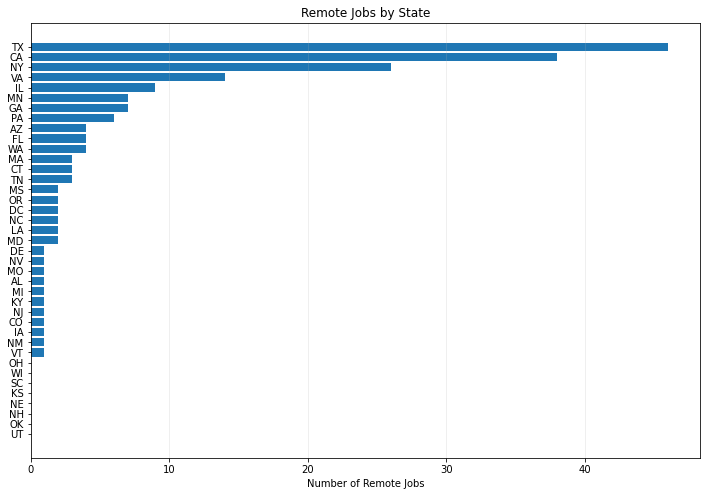

In [23]:


plt.figure(figsize = (12,8))
plt.barh(df.state, df.remote_jobs)
plt.title("Remote Jobs by State")
plt.xlabel("Number of Remote Jobs")
plt.grid(axis="x", alpha=0.25)
plt.show()

In [28]:
#Query for Jobs by states

query = """
select 
    st.state,
    count (j.id) as total_jobs
from 
    job j
    join state st on j.state_id = st.id
group by 
    st.state  
order by
    total_jobs desc;
"""
df = pd.read_sql(query, engine)
df.head()




,state,total_jobs
0,TX,218
1,CA,73
2,NY,48
3,VA,21
4,IL,15


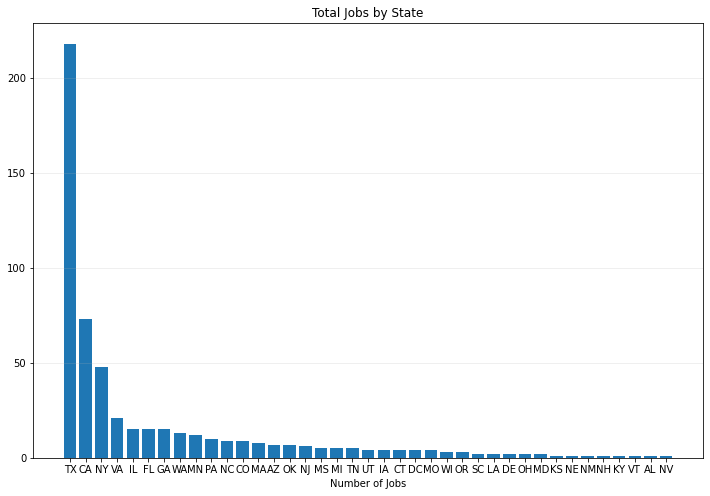

In [30]:
plt.figure(figsize = (12,8))
plt.bar(df.state, df.total_jobs)
plt.title("Total Jobs by State")
plt.xlabel("Number of Jobs")
plt.grid(axis="y", alpha=0.25)
plt.show()

In [33]:
#Status
#Employment status by jobs

query = """
select 
    s.status,
    count (j.id) as total_jobs
from 
    job j
    join status s on j.status_id = s.id
group by 
    s.status  
order by
    total_jobs desc;
    
"""
df = pd.read_sql(query, engine)
df.head(10)

,status,total_jobs
0,Full-time,440
1,Contract,104
2,Part-time,7
3,Temporary,2
4,Seasonal,1
5,Internship,1


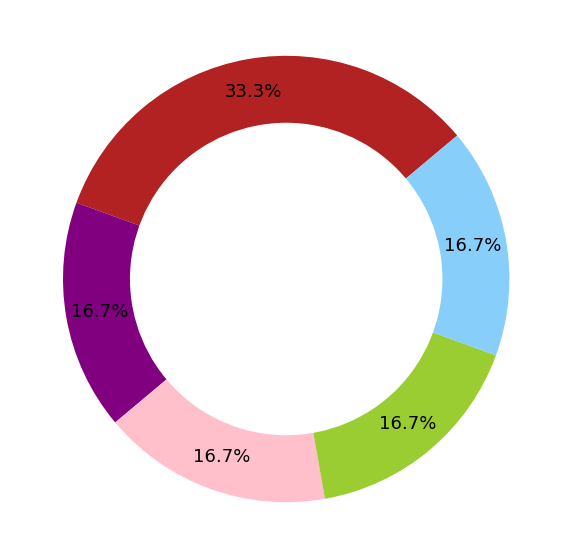

In [52]:
x = df.status.value_counts().index.tolist()
y = df.total_jobs.value_counts().values.tolist()
colors = ["firebrick", "purple", "pink", "yellowgreen", "lightskyblue", "lightcoral"]
explode = (0, 0, 0, 0, 0, 0)
fig = plt.figure(figsize=(10,10))
plt.title("", fontsize = 26, fontweight = "bold", font = "DejaVu Sans")
plt.axis("equal")
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.pie(y, explode=None, labels=None, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=40, textprops={'fontsize': 18}, pctdistance=0.85)
fig.gca().add_artist(centre_circle)
plt.show()

In [31]:
#Status
#Full-time job query by companies
query = """
select
    c.company,
    count (j.id) as num_jobs
FROM
    job j 
    join status s on j.status_id = s.id
    join company c on j.company_id = c.id
WHERE
    s.status = 'Full-time'
group by
    c.company
order by
    num_jobs desc;
"""
df = pd.read_sql(query, engine)
df.head(10)

,company,num_jobs
0,UnitedHealth Group,9
1,Tesla,8
2,"JPMorgan Chase Bank, N.A.",7
3,Mayo Clinic,5
4,The New York Times,4
5,Toyota,4
6,Tek Ninjas,4
7,PayPal,3
8,Okaya Corp,3
9,Health & Human Services Comm,3


In [ ]:
plt.figure
plt.scatter(x, y, s=96, facecolor="cornflowerblue", edgecolor="seagreen", linewidth=4)

plt.title("Horsepower vs MPG", fontsize=20, fontweight="bold")
plt.xlabel("Horsepower", fontsize=16)
plt.ylabel("MPG", fontsize=16)

plt.xlim(40, 240)
plt.ylim(0, 50)
plt.grid(axis="y", alpha=0.25, color="lightgrey")






plt.show()